In [43]:
import tensorflow as tf

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [45]:
df = pd.read_csv("J:/Data science/data/Digit.csv")

In [46]:
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [47]:
df.shape

(42000, 785)

In [48]:
df['label']

0        1
1        0
2        1
3        4
4        0
        ..
41995    0
41996    1
41997    7
41998    6
41999    9
Name: label, Length: 42000, dtype: int64

In [49]:
# label column
df.iloc[:,:1]

,label
0,1
1,0
2,1
3,4
4,0
...,...
41995,0
41996,1
41997,7
41998,6


In [50]:
images = df.iloc[0:4200 , 1:]
labels = df.iloc[0:4200 , :1]

In [51]:
images

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4195,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4196,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4197,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4198,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [52]:
type(images)

pandas.core.frame.DataFrame

In [53]:
labels

,label
0,1
1,0
2,1
3,4
4,0
...,...
4195,4
4196,5
4197,9
4198,2


In [54]:
type(labels)

pandas.core.frame.DataFrame

In [55]:
#sikitlearn
from sklearn.model_selection import train_test_split
train_img , test_img , train_label , test_label = train_test_split(images,labels,
                                                                    test_size=0.2 ,random_state=101 )

In [56]:
# i = 1
# img = np.array(train_img.iloc[i]).as_matrix()
# # img = img.reshape((28,28))
# # plt.imshow(img,cmap='gray')

The digit is  label    7
Name: 1955, dtype: int64


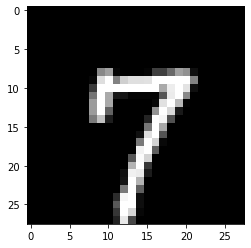

In [57]:
index = 10
image = np.array(train_img.iloc[index]).reshape(28,28)
plt.imshow(image)
plt.gray()
print("The digit is ", train_label.iloc[index])
plt.show()

In [58]:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# train_img = scaler.fit_transform(train_img)
# test_img = scaler.transform(test_img)

In [59]:
tf.random.set_seed(42)
model = tf.keras.Sequential([
    #flatten
    #input layers
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(64,activation='relu'),
    tf.keras.layers.Dense(32,activation='relu'),
    #output layers
    tf.keras.layers.Dense(10,activation='softmax')
])

In [60]:
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              optimizer = tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

In [61]:
model_history = model.fit(train_img,train_label,epochs=5)

Epoch 1/5
105/105 [==============================] - 4s 5ms/step - loss: 12.4423 - accuracy: 0.5854
Epoch 2/5
105/105 [==============================] - 1s 7ms/step - loss: 2.4176 - accuracy: 0.7693
Epoch 3/5
105/105 [==============================] - 0s 2ms/step - loss: 1.3680 - accuracy: 0.8313
Epoch 4/5
105/105 [==============================] - 1s 9ms/step - loss: 0.9232 - accuracy: 0.8679
Epoch 5/5
105/105 [==============================] - 0s 2ms/step - loss: 0.5876 - accuracy: 0.9077


In [62]:
model.evaluate(test_img,test_label)

27/27 [==============================] - 1s 4ms/step - loss: 1.8687 - accuracy: 0.8202


[1.8687306642532349, 0.8202381134033203]

In [63]:
y_probs = model.predict(test_img)
y_probs

27/27 [==============================] - 0s 3ms/step


array([[1.16868385e-07, 9.18439955e-30, 6.60787996e-24, ...,
        3.14555612e-14, 2.59192973e-10, 1.66368942e-21],
       [5.08028039e-22, 8.08642764e-30, 1.00000000e+00, ...,
        4.91619891e-25, 2.31225443e-14, 3.21182351e-24],
       [1.18178129e-21, 1.31501228e-13, 2.12209519e-20, ...,
        2.09672249e-14, 5.43572980e-07, 1.58782121e-09],
       ...,
       [9.69390631e-01, 6.87368015e-07, 3.07131013e-05, ...,
        2.28862479e-16, 5.69490385e-06, 1.38195145e-14],
       [5.91287233e-07, 1.15792149e-08, 4.25096491e-09, ...,
        5.93891402e-18, 9.99999404e-01, 3.23121693e-22],
       [4.66567145e-21, 2.35252343e-31, 3.04097990e-23, ...,
        2.08216548e-07, 3.03808133e-06, 3.11905319e-06]], dtype=float32)

In [64]:
y_pred = y_probs.argmax(axis=1)
y_pred

array([4, 2, 5, 2, 0, 1, 2, 4, 7, 7, 8, 4, 7, 7, 3, 2, 3, 2, 3, 0, 6, 4,
       5, 1, 0, 6, 1, 1, 9, 8, 3, 2, 3, 8, 5, 1, 4, 2, 1, 6, 9, 0, 1, 0,
       6, 3, 2, 2, 8, 5, 9, 5, 7, 0, 2, 5, 2, 6, 5, 8, 3, 6, 8, 9, 3, 2,
       3, 7, 6, 5, 7, 6, 1, 7, 1, 9, 2, 8, 9, 8, 1, 5, 5, 8, 3, 8, 5, 7,
       6, 8, 6, 8, 7, 6, 6, 0, 1, 2, 1, 2, 6, 2, 2, 9, 7, 5, 7, 6, 7, 7,
       1, 3, 4, 5, 0, 5, 2, 0, 2, 9, 1, 7, 6, 3, 5, 6, 0, 6, 5, 0, 7, 3,
       2, 5, 4, 7, 0, 8, 2, 2, 8, 6, 5, 6, 9, 3, 8, 3, 2, 8, 1, 2, 2, 1,
       5, 4, 7, 6, 4, 4, 4, 1, 0, 3, 1, 5, 6, 7, 6, 7, 0, 2, 3, 5, 0, 7,
       6, 6, 8, 6, 1, 8, 0, 1, 9, 6, 9, 4, 4, 5, 8, 0, 4, 3, 5, 7, 2, 0,
       6, 6, 3, 1, 8, 5, 0, 3, 5, 0, 1, 0, 0, 6, 4, 7, 7, 8, 0, 0, 6, 9,
       2, 2, 0, 6, 0, 0, 7, 7, 9, 0, 7, 2, 3, 0, 2, 9, 7, 8, 2, 1, 2, 7,
       0, 6, 5, 7, 3, 6, 9, 2, 9, 0, 0, 8, 1, 4, 4, 8, 5, 1, 8, 5, 4, 2,
       1, 0, 9, 7, 4, 4, 2, 2, 4, 6, 7, 8, 5, 9, 7, 1, 7, 7, 6, 3, 3, 9,
       9, 8, 6, 1, 2, 6, 3, 4, 7, 0, 0, 7, 9, 8, 6,

In [65]:
test_img

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
649,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1900,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2727,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4117,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3699,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4120,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1621,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
896,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
887,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


The digit is  7


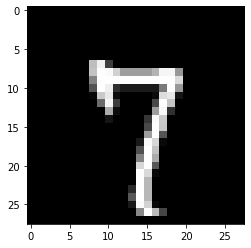

In [66]:
index = 8
image = np.array(test_img.iloc[index]).reshape(28,28)
plt.imshow(image)
plt.gray()
print("The digit is ", y_pred[index])
plt.show()

The digit is  7


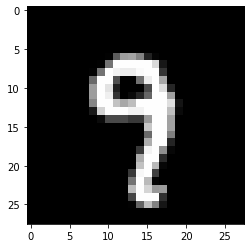

In [67]:
index = 13
image = np.array(test_img.iloc[index]).reshape(28,28)
plt.imshow(image)
plt.gray()
print("The digit is ", y_pred[index])
plt.show()

In [68]:
tf.random.set_seed(42)
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(40,activation='relu'),
    tf.keras.layers.Dense(20,activation='relu'),
    tf.keras.layers.Dense(10,activation='softmax')
])

In [69]:
model_2.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              optimizer = tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

In [70]:
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

In [71]:
model_2_history = model.fit(train_img,train_label,epochs= 15 , callbacks=[lr_scheduler])
model_2_history

Epoch 1/15
105/105 [==============================] - 0s 2ms/step - loss: 0.4420 - accuracy: 0.9217 - lr: 0.0010
Epoch 2/15
105/105 [==============================] - 0s 4ms/step - loss: 0.2397 - accuracy: 0.9476 - lr: 0.0011
Epoch 3/15
105/105 [==============================] - 0s 4ms/step - loss: 0.2628 - accuracy: 0.9390 - lr: 0.0013
Epoch 4/15
105/105 [==============================] - 0s 3ms/step - loss: 0.4460 - accuracy: 0.9277 - lr: 0.0014
Epoch 5/15
105/105 [==============================] - 0s 3ms/step - loss: 0.5173 - accuracy: 0.9277 - lr: 0.0016
Epoch 6/15
105/105 [==============================] - 0s 4ms/step - loss: 0.7006 - accuracy: 0.9027 - lr: 0.0018
Epoch 7/15
105/105 [==============================] - 0s 4ms/step - loss: 0.7812 - accuracy: 0.8964 - lr: 0.0020
Epoch 8/15
105/105 [==============================] - 0s 4ms/step - loss: 0.5852 - accuracy: 0.9167 - lr: 0.0022
Epoch 9/15
105/105 [==============================] - 0s 4ms/step - loss: 0.4955 - accuracy: 0.9

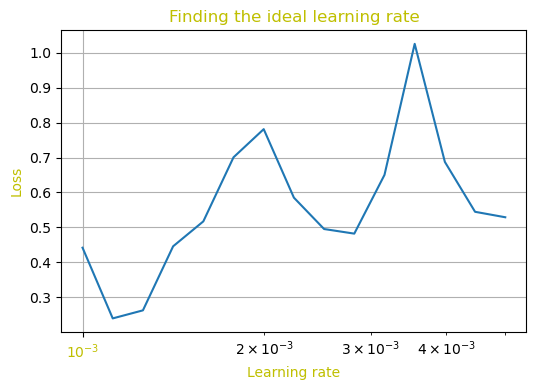

In [72]:
# 15 is the number of epochs
plt.figure(dpi=100)
lrs = 1e-3 * (10**(np.arange(15)/20))
plt.semilogx(lrs, model_2_history.history["loss"]) # want the x-axis to be log-scale
plt.xlabel("Learning rate" , c='y')
plt.ylabel("Loss", c='y')
plt.title("Finding the ideal learning rate", c='y')
plt.xticks(c='y')
plt.grid()

In [73]:
1e-3

0.001

In [74]:
2e-3

0.002

In [75]:
model_2.evaluate(test_img,test_label)

27/27 [==============================] - 1s 1ms/step - loss: 81.1980 - accuracy: 0.1202


[81.19802856445312, 0.12023809552192688]

In [76]:
from sklearn.metrics import confusion_matrix
conf = confusion_matrix(test_label,y_pred)
conf

array([[80,  0,  3,  2,  0,  0,  0,  0,  0,  1],
       [ 0, 84,  1,  0,  0,  1,  1,  1,  1,  0],
       [ 3,  3, 75,  1,  1,  1,  6,  1,  6,  0],
       [ 1,  2,  2, 72,  0,  4,  0,  0,  3,  1],
       [ 0,  0,  1,  0, 68,  1,  0,  9,  3,  7],
       [ 1,  1,  1,  1,  0, 59,  2,  0,  1,  0],
       [ 1,  0,  6,  0,  2,  6, 74,  0,  1,  0],
       [ 1,  0,  1,  0,  3,  1,  0, 71,  1,  6],
       [ 0,  2,  2,  6,  3,  3,  1,  4, 62,  0],
       [ 1,  0,  3,  0,  8,  2,  0, 13,  0, 44]], dtype=int64)

In [77]:
#plot conffffff matrix

# Note: The following confusion matrix code is a remix of Scikit-Learn's 
# plot_confusion_matrix function - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html
# and Made with ML's introductory notebook - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
import itertools
from sklearn.metrics import confusion_matrix

# Our function needs a different name to sklearn's plot_confusion_matrix
def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(8,9), text_size=10): 
  """Makes a labelled confusion matrix comparing predictions and ground truth labels.

  If classes is passed, confusion matrix will be labelled, if not, integer class values
  will be used.

  Args:
    y_true: Array of truth labels (must be same shape as y_pred).
    y_pred: Array of predicted labels (must be same shape as y_true).
    classes: Array of class labels (e.g. string form). If `None`, integer labels are used.
    figsize: Size of output figure (default=(10, 10)).
    text_size: Size of output figure text (default=15).
  
  Returns:
    A labelled confusion matrix plot comparing y_true and y_pred.

  Example usage:
    make_confusion_matrix(y_true=test_labels, # ground truth test labels
                          y_pred=y_preds, # predicted labels
                          classes=class_names, # array of class label names
                          figsize=(15, 15),
                          text_size=10)
  """  
  # Create the confustion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
  n_classes = cm.shape[0] # find the number of classes we're dealing with

  # Plot the figure and make it pretty
  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues) # colors will represent how 'correct' a class is, darker == better
  fig.colorbar(cax)

  # Are there a list of classes?
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])
  
  # Label the axes
  ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes), # create enough axis slots for each class
         yticks=np.arange(n_classes), 
         xticklabels=labels, # axes will labeled with class names (if they exist) or ints
         yticklabels=labels),
         
  
  # Make x-axis labels appear on bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Set the threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
             horizontalalignment="center",
             color="white" if cm[i, j] > threshold else "black",
             size=text_size)

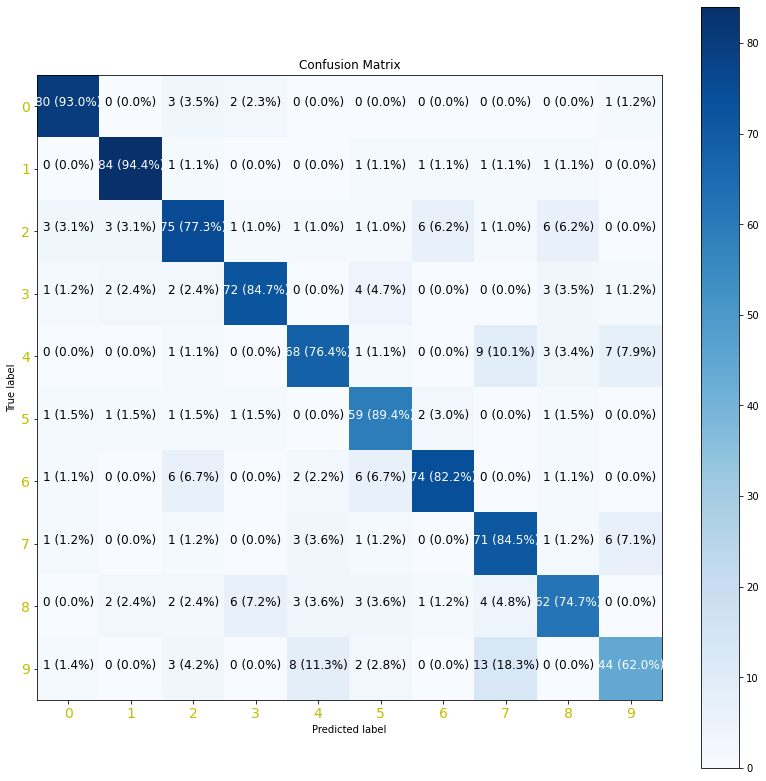

In [78]:
make_confusion_matrix(y_true=test_label, 
                      y_pred=y_pred,
#                       classes=class_names,
                      figsize=(14,14),
                      text_size=12)
plt.xticks(c='y' , size='14')
plt.yticks(c='y' , size='14');